<h1>Superconductivity Data Analysis</h1>

<p>From this visulization, we explore a dataset from the UCI Machine Learning Repository with information on 21,263 superconductors. Each material is described by 81 features, and the goal is to understand how these features relate to the critical temperature, the point at which a material becomes superconductive.

We'll use Seaborn for data visualization to spot patterns, trends, and relationships in the data.

The dataset comes from a 2018 research paper by Kiarash Hamidieh, which focused on predicting critical temperature from material properties. Here, we’re just aiming to get insights through visual exploration.

This dataset was originally presented in:
> *Hamidieh, K. (2018). A data-driven statistical model for predicting the critical temperature of a superconductor. Computational Materials Science.*

---
</p>

<h3>Load Dataset</h3>
<p>Peek through the dataset and load, and display the first five rows of data. This helps us understand the structure of the dataset how the features are organized, what kind of values we’re dealing with, and how the critical temperature is presented.</p>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('train.csv')

# Show the first five rows
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


<h3>Visualization 1: Distribution of Critical Temperature</h3>

<p>
    <h4>Purpose</h4>
This plot shows how the critical temperature, the point where a material becomes superconductive, is distributed across all materials in the dataset. By visualizing this, we can better understand the overall range and how common certain temperature values are.
    
<h4>Insights</h4>

The distribution is right-skewed, meaning most superconductors have lower critical temperatures.

There's a large concentration of materials with critical temperatures under 25K, and the frequency steadily drops as the temperature increases.

A few materials do exhibit much higher critical temperatures even above 100K, but they are relatively rare.

This insight is important for model building, as it shows the data is not evenly spread, and models may need to handle this imbalance.

<h4>Effectiveness and Expressiveness</h4>
This plot shows the imbalance in the data using bar height to represent frequency, making it easy to spot trends like skewness and outliers. This helps us understand that models may need to account for the uneven distribution to avoid bias toward the more common, lower temperature values which makes this effective and expressive. 
</p>

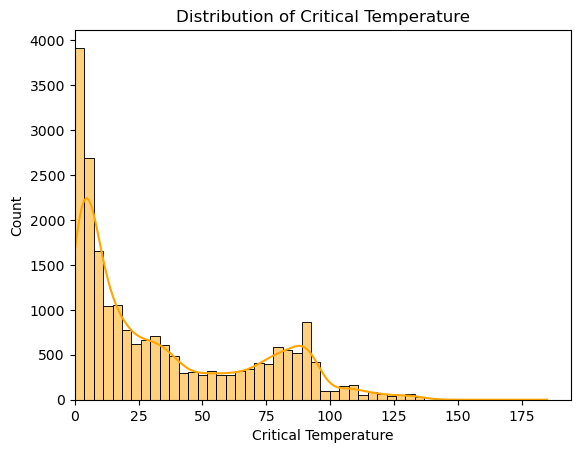

In [27]:
plt.figure()

# Plot a histogram of critical temperatures with KDE line
sns.histplot(df['critical_temp'], bins=50, kde=True, color="orange")

# Set title and axis labels
plt.title('Distribution of Critical Temperature')
plt.xlabel('Critical Temperature')
plt.ylabel('Count')

# Set x and y axes to start at zero
plt.xlim(left=0)
plt.ylim(bottom=0)

# Save the plot as an image
plt.savefig('ChakerBaloch_CriticalTempDistribution.png')

plt.show()

<h3>Visualization 2: Correlation Heatmap of Top Features</h3>
<p>
    <h4>Purpose</h4>
    This heatmap helps us see how the top 10 features (that are most related to the critical temperature) are related to each other. It's like a quick check to see which features behave similarly and which ones act differently. This is super useful when we start building
models, so we don’t include features that basically say the same thing.

<h4>Insights</h4>
    Some features, like the ones related to thermal conductivity, are really similar to each other, they move almost the same way. That means we probably don’t need to include all of them in our model.

A few features, like valence-related stats, go in the opposite direction compared to most others, that might mean lower valence values are connected to higher superconducting temperatures.

Features like atomic mass, atomic radius, and number of elements are tightly connected, probably because they describe similar characteristics of the materials.

So, overall, this heatmap gives us a clearer picture of what’s going on between the most important features and helps us avoid repeating information when we train our model.

<h4>Effectiveness and Expressiveness</h4>
The heatmap is both expressive and effective, it uses color intensity to clearly show the strength and direction of relationships between features. This visual design helps us quickly identify clusters of similar features and contrasting ones, making it easier to choose the right inputs for predictive modeling.
    
</p>

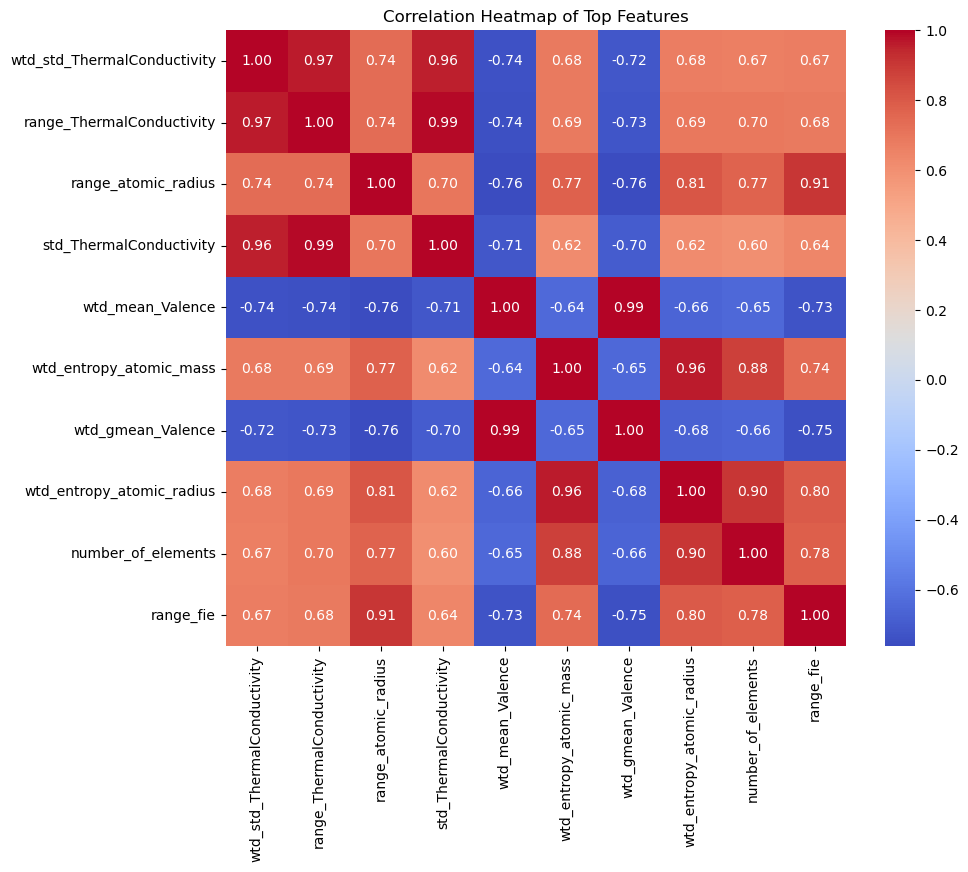

In [15]:
# Compute correlation matrix
corr = df.corr()

# Get top 10 features most correlated with 'critical_temp'
top_features = corr['critical_temp'].abs().sort_values(ascending=False)[1:11].index

# Set figure size
plt.figure(figsize=(10, 8))

# Plot heatmap of correlations among top features
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap of Top Features')

# Save plot as image
plt.savefig('ChakerBaloch_CorrelationHeatmap.png')

plt.show()


<h3>Visualization 3: Critical Temperature vs Mean Atomic Mass</h3>
<p>
<h4>Purpose</h4>
The goal of this visualization is to explore the relationship between a superconductor's mean atomic mass and its critical temperature, the temperature below at which it becomes superconducting.

<h4>Insights</h4>
From the scatter plot, we can see a wide spread of critical temperatures for different mean atomic masses. Most data points are clustered between atomic masses of 20 and 140, with temperatures ranging from low to high. However, the red regression line slopes downward, suggesting a weak negative trend, meaning that superconductors with higher mean atomic mass tend to have slightly lower critical temperatures on average.

Despite this trend, the relationship is not strong or clearly linear. The broad dispersion of points and the visible clusters suggest that other factors besides atomic mass are likely influencing the critical temperature. This implies that mean atomic mass alone may not be a good predictor and that more complex or combined features might be needed to understand superconductivity better.

<h4>Effectiveness and Expressiveness</h4>
The scatterplot captures the variability across individual data points, while the regression line adds context by indicating overall direction. This helps users quickly assess both the lack of strong correlation and the potential for more complex patterns, making it a useful tool for initial data exploration
</p>

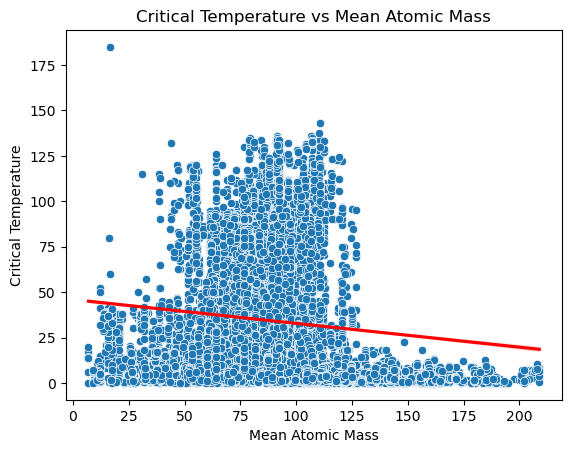

In [19]:

plt.figure()

# Plot a scatterplot of mean atomic mass vs critical temperature
sns.scatterplot(x='mean_atomic_mass', y='critical_temp', data=df)

# Add a regression line (without scatter points) in red
sns.regplot(x='mean_atomic_mass', y='critical_temp', data=df, scatter=False, color='red')

# Set plot title and axis labels
plt.title('Critical Temperature vs Mean Atomic Mass')
plt.xlabel('Mean Atomic Mass')
plt.ylabel('Critical Temperature')

# Save the plot as an image
plt.savefig('ChakerBaloch_CriticalTemp_vs_MeanAtomicMass.png')

plt.show()


<h3>Visualization 4: Critical Temperature by Number of Elements</h3>
<p>
<h4>Purpose</h4>
This chart helps us understand how the number of different elements in a superconductor affects its critical temperature, the temperature at which it becomes superconducting.

<h4>Insights</h4>
From the boxplot, we can see a clear trend: superconductors made with more elements generally have higher and more varied critical temperatures.

Materials with just 1–3 elements mostly have low critical temperatures and less variation.

Starting from 4 elements onward, the critical temperature range becomes wider, and the median temperature increases.

The highest critical temperatures tend to occur in superconductors with 6 to 9 elements, suggesting that more complex combinations of elements might contribute to better superconducting properties.

This may indicate that the diversity of elements in a material contributes positively to superconductivity—perhaps due to more interactions between atoms that improve performance.

<h4>Effectiveness and Expressiveness</h4>
The use of a boxplot is both expressive and effective, it clearly shows medians, ranges, and outliers across categories. This makes it easy to compare distributions and spot trends, helping users quickly grasp how element count influences superconductivity.
</p>

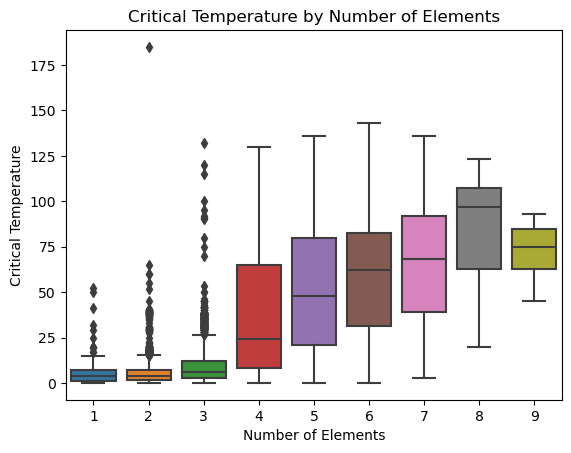

In [23]:

plt.figure()

# Create a boxplot of critical temperature grouped by number of elements
sns.boxplot(x='number_of_elements', y='critical_temp', data=df)

# Set plot title and axis labels
plt.title('Critical Temperature by Number of Elements')
plt.xlabel('Number of Elements')
plt.ylabel('Critical Temperature')

# Save the plot as an image
plt.savefig('ChakerBaloch_CriticalTemp_by_NumElements.png')


plt.show()


<h3>Visualization 5: Pairplot of Selected Features</h3>
<p>
<h4>Purpose</h4>
The goal of this pairplot is to explore how atomic mass-related features, such as mean, standard deviation, range, and entropy relate to each other and to the critical temperature of superconductors. It helps identify potential correlations, clusters, and patterns that could inform further analysis or model building.

<h4>Insights</h4>
The plot reveals that some features, like standard deviation and range of atomic mass, are strongly correlated, meaning they likely convey similar information. Critical temperature does not show a clear linear relationship with any one feature, but entropy and standard deviation display scattered patterns that might suggest more complex, non-linear interactions.

<h4>Effectiveness and Expressiveness</h4>
The diagonal histograms help visualize the distribution of each feature, showing, for example, that critical temperature is right-skewed. Overall, the visualization effectively highlights both relationships and feature behavior.
</p>

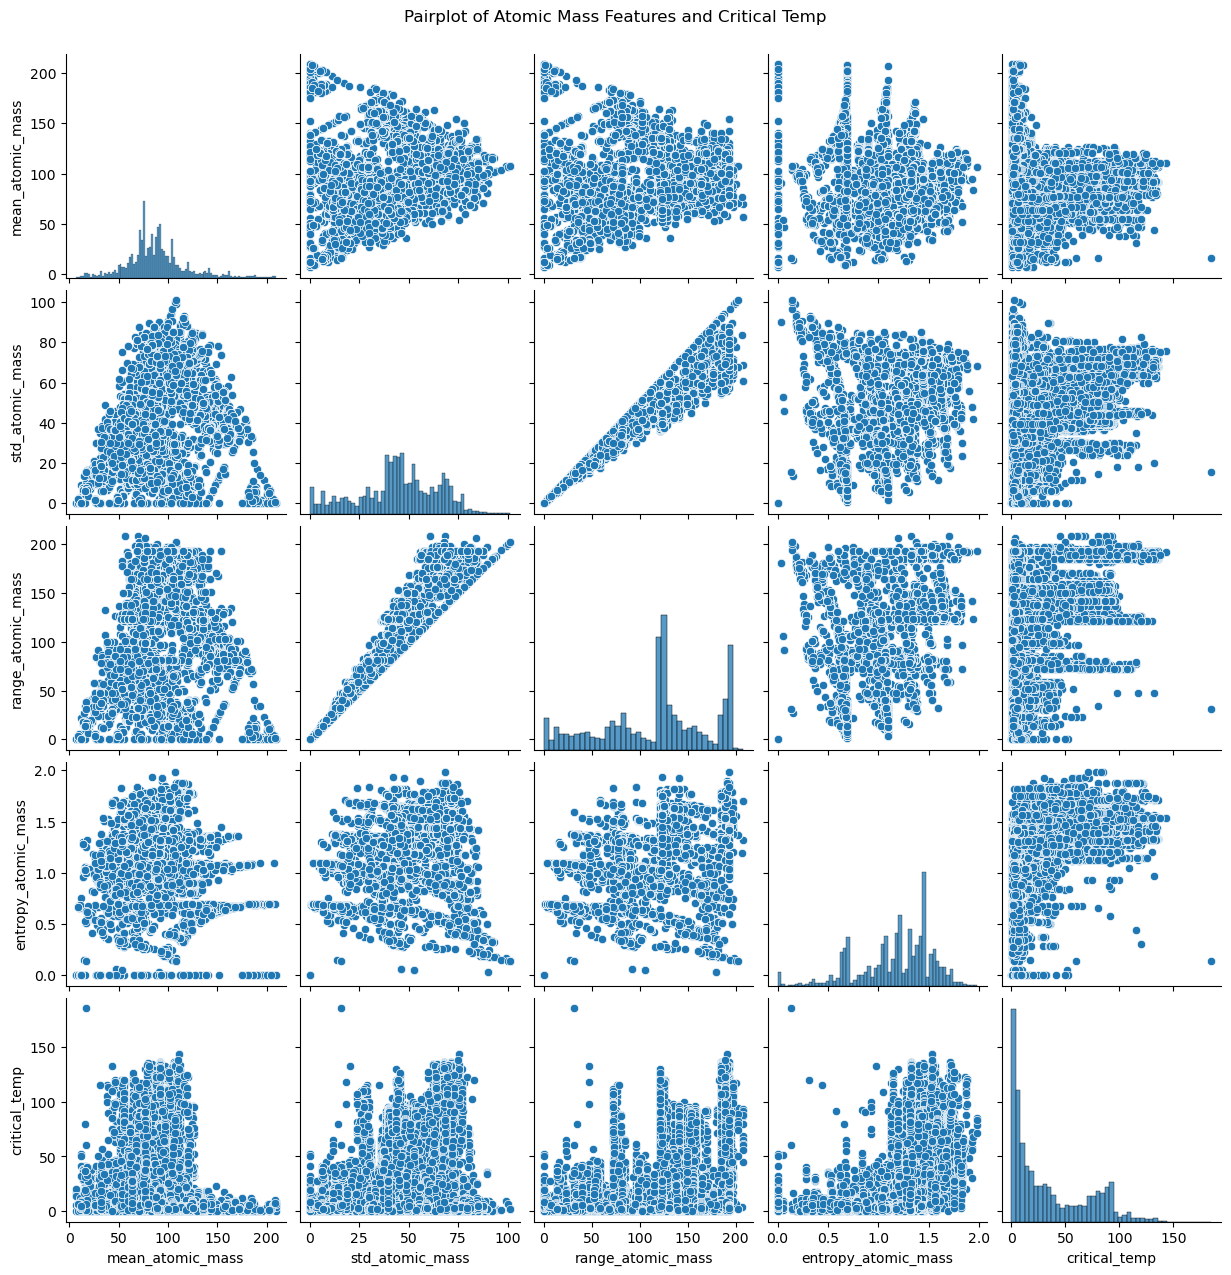

In [25]:
# Select specific features for the pairplot
features = ['mean_atomic_mass', 'std_atomic_mass', 'range_atomic_mass', 'entropy_atomic_mass', 'critical_temp']

# Create pairplot to show relationships between selected features
grid = sns.pairplot(df[features])

# Set the main title above the plots
grid.fig.suptitle("Pairplot of Atomic Mass Features and Critical Temp", y=1.02)

# Save the pairplot as an image
grid.fig.savefig('ChakerBaloch_Pairplot_SelectedFeatures.png')

plt.show()
